In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv(r'Downloads\NIFTY (2).csv')

In [3]:
def tech_indicators(df):
    df.dropna(inplace=True) #Dropping Missing Values
    df.reset_index(drop=True, inplace=True) 
    #Simple moving average
    df['SMA']= df['Close'].rolling(10).mean()
    #Exponential moving average for n=10 and s=2
    df['EMA10'] = df['Close'].ewm(span=10, adjust=False).mean()
    #MACD
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    #Range
    df['Range']=df['High'].rolling(10).max()-df['Low'].rolling(10).min()
    #Scholastic Oscillator
    high14 = df['High'].rolling(14).max()
    low14 = df['Low'].rolling(14).min()
    df['%K'] = (df['Close'] - low14)*100/(high14 - low14)
    df['%D'] = df['%K'].rolling(3).mean()
    # Money Flow Index
    typical_price = (df['Close'] + df['High'] + df['Low']) / 3
    period = 14
    money_flow = typical_price * df['Volume']
    positive_flow = []
    negative_flow = []
    for i in range(1, len(typical_price)):
        if typical_price[i] > typical_price[i-1]:
            positive_flow.append(money_flow[i-1])
            negative_flow.append(0)
        elif typical_price[i] < typical_price[i-1]:
            negative_flow.append(money_flow[i-1])
            positive_flow.append(0)
        else:
            positive_flow.append(0)
            negative_flow.append(0)
    positive_mf = []
    negative_mf = []
    for i in range(period-1, len(positive_flow)):
        positive_mf.append( sum(positive_flow[i + 1- period : i+1]))
    
    for i in range(period-1, len(negative_flow)):
        negative_mf.append( sum(negative_flow[i + 1- period : i+1]))
    MFI = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf) ))
    df['MFI']=np.nan
    for i in range(13,len(df)):
            df['MFI'][i]= MFI[i-14]
 
tech_indicators(df);
   

<ipython-input-3-1139e28d369a>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MFI'][i]= MFI[i-14]


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

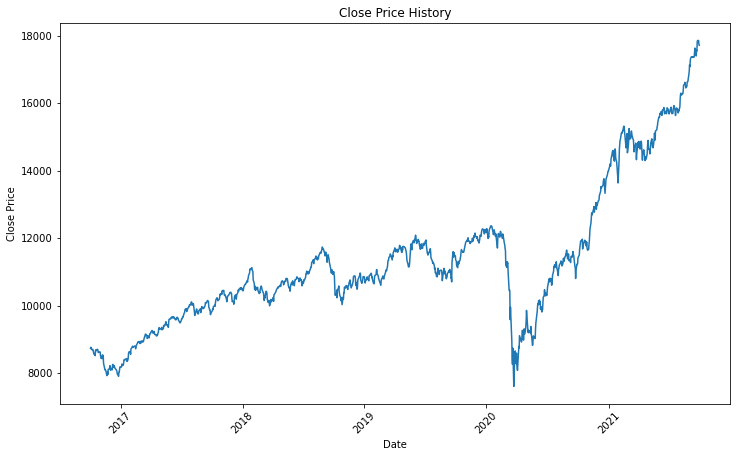

In [5]:
plt.figure(figsize=(12,7))
plt.plot(df['Date'],df['Close'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA10,MACD,Range,%K,%D,MFI
0,2016-10-03,8666.150391,8745.200195,8635.000000,8738.099609,8738.099609,137300.0,NaN,8738.099609,0.000000,NaN,NaN,NaN,NaN
1,2016-10-04,8770.000000,8783.650391,8736.099609,8769.150391,8769.150391,184300.0,NaN,8743.745206,2.476985,NaN,NaN,NaN,NaN
2,2016-10-05,8806.349609,8806.950195,8731.400391,8743.950195,8743.950195,157200.0,NaN,8743.782477,2.379144,NaN,NaN,NaN,NaN
3,2016-10-06,8768.700195,8781.150391,8684.650391,8709.549805,8709.549805,163600.0,NaN,8737.558354,-0.468816,NaN,NaN,NaN,NaN
4,2016-10-07,8721.700195,8723.700195,8663.799805,8697.599609,8697.599609,150400.0,NaN,8730.293128,-3.648073,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA10,MACD,Range,%K,%D,MFI
1223,2021-09-23,17670.849609,17843.900391,17646.550781,17822.949219,17822.949219,320500.0,17516.715039,17515.932692,302.313528,574.750000,96.683373,77.265038,71.803117
1224,2021-09-24,17897.449219,17947.650391,17819.400391,17853.199219,17853.199219,360100.0,17565.109961,17577.253879,310.218439,678.500000,86.379550,83.157634,72.362170
1225,2021-09-27,17932.199219,17943.500000,17802.900391,17855.099609,17855.099609,295700.0,17615.089844,17627.771284,313.028091,621.550782,86.653598,89.905507,64.899421
1226,2021-09-28,17906.449219,17912.849609,17576.099609,17748.599609,17748.599609,398000.0,17651.949805,17649.740071,303.166387,621.550782,71.295631,81.442926,63.835052
1227,2021-09-29,17657.949219,17781.750000,17608.150391,17711.300781,17711.300781,562200.0,17671.134961,17660.932927,289.009688,621.550782,65.165864,74.371698,61.661139


# Simple Moving Average

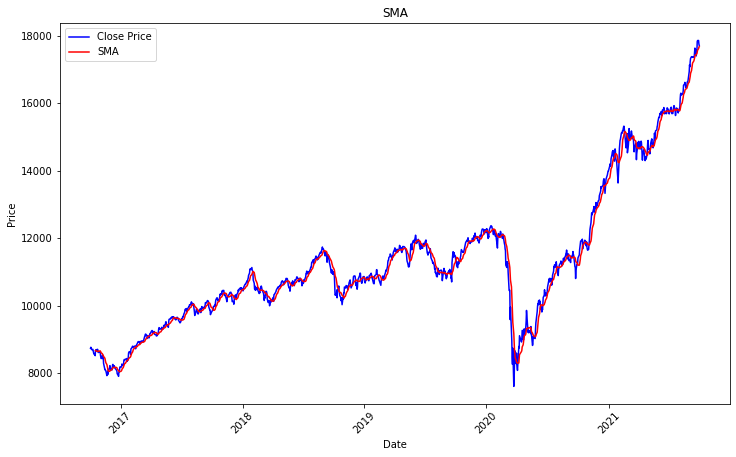

In [8]:
plt.figure(figsize=(12,7))
plt.plot(df['Date'],df['Close'], label='Close Price',color='blue')
plt.plot(df['Date'],df['SMA'], label='SMA',color='Red')
plt.title('SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

# Exponential Moving Average

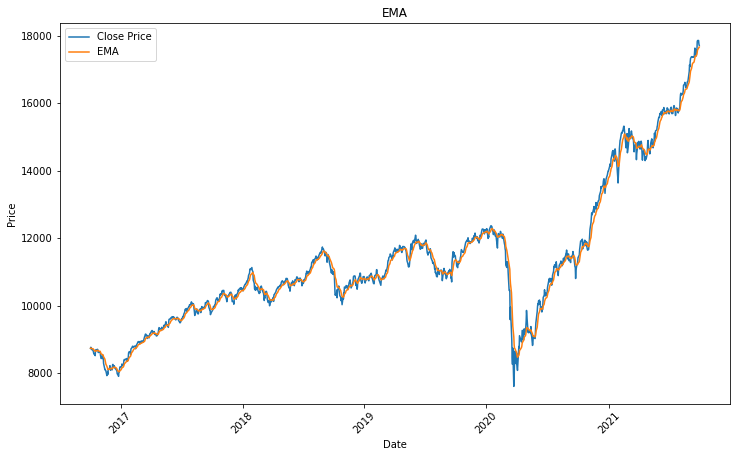

In [9]:
plt.figure(figsize=(12,7))
plt.plot(df['Date'],df['Close'], label='Close Price')
plt.plot(df['Date'],df['EMA10'], label='EMA')
plt.title('EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

# MACD 

<AxesSubplot:label='19f1e539-7e8a-454c-a3ac-609156778a0a'>

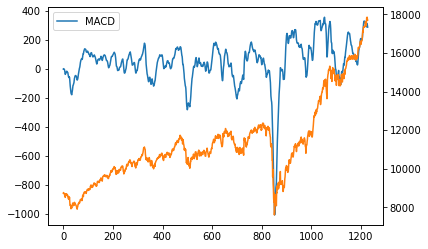

In [10]:
fig, ax = plt.subplots()
df[['MACD']].plot(ax=ax)
df['Close'].plot(ax=ax, secondary_y=True)

# Range

<AxesSubplot:label='de8f80a0-7589-4523-86fc-be417a633286'>

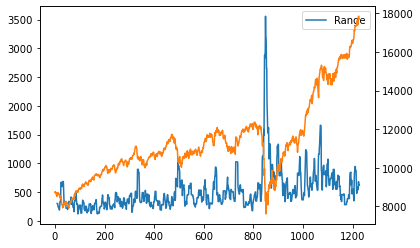

In [11]:
fig, ax = plt.subplots()
df[['Range']].plot(ax=ax)
df['Close'].plot(ax=ax, secondary_y=True)

# Stochastic Oscillators

<AxesSubplot:label='d33bfec0-6173-4065-8e4d-6c6c96c8995a'>

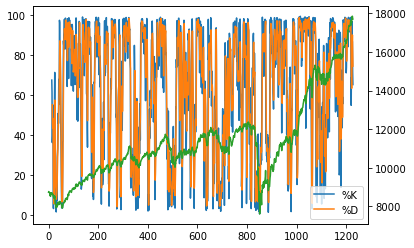

In [12]:
fig, ax = plt.subplots()
df[['%K', '%D']].plot(ax=ax)
df['Close'].plot(ax=ax, secondary_y=True)

# Money Flow Index 

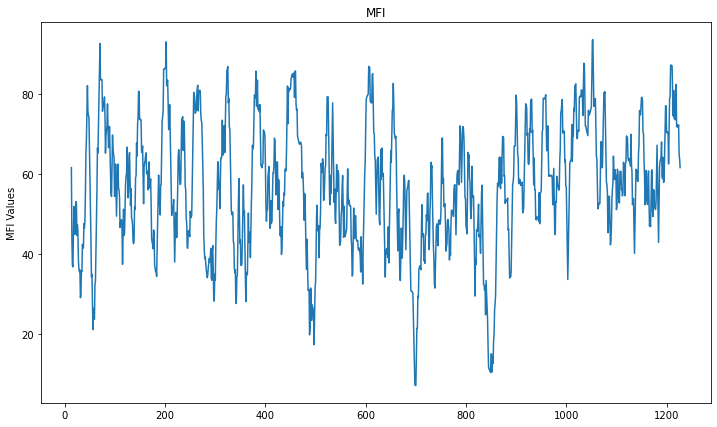

In [13]:
plt.figure(figsize=(12,7))
plt.plot(df['MFI'], label='MFI')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.show()

# Scaling

In [14]:
df['Diff']=df['Close'].pct_change()*df['Close']
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA10,MACD,Range,%K,%D,MFI,Diff
0,2016-10-26,8657.299805,8657.299805,8596.599609,8615.25,8615.25,219300.0,8642.210059,8667.204552,-18.680167,230.799804,36.269840,55.080801,37.258638,-75.384361
1,2016-10-27,8607.099609,8624.849609,8550.250000,8615.25,8615.25,242800.0,8646.400098,8657.758270,-21.649220,230.799804,39.672585,45.831599,36.769053,0.000000
2,2016-10-28,8625.000000,8653.750000,8581.750000,8638.00,8638.00,175500.0,8651.860059,8654.165857,-21.913871,230.799804,55.017706,43.653377,45.178541,22.810075
3,2016-11-01,8653.150391,8669.599609,8614.500000,8626.25,8626.25,165000.0,8662.445020,8649.090247,-22.808810,186.700195,50.114710,48.268334,51.942422,-11.734017
4,2016-11-02,8542.799805,8549.500000,8504.849609,8514.00,8514.00,155300.0,8646.054980,8624.528384,-32.204460,232.100586,3.942425,36.358280,45.698286,-110.789335


In [15]:
df1=df.drop(['Date'],axis =1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df1)
df1=pd.DataFrame(scaled)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.293816,-1.316510,-1.292591,-1.309033,-1.309033,-0.753289,-1.302864,-1.292845,-0.418829,-0.823836,-0.903767,-0.304291,-1.257374,-0.693145
1,-1.317852,-1.332010,-1.314892,-1.309033,-1.309033,-0.654252,-1.300823,-1.297454,-0.437344,-0.823836,-0.791468,-0.632665,-1.288720,-0.072722
2,-1.309281,-1.318205,-1.299736,-1.298144,-1.298144,-0.937876,-1.298163,-1.299207,-0.438995,-0.823836,-0.285043,-0.709998,-0.750311,0.115008
3,-1.295802,-1.310635,-1.283978,-1.303768,-1.303768,-0.982126,-1.293006,-1.301684,-0.444576,-0.948108,-0.446853,-0.546154,-0.317261,-0.169294
4,-1.348639,-1.368002,-1.336737,-1.357498,-1.357498,-1.023005,-1.300991,-1.313669,-0.503167,-0.820171,-1.970648,-0.968995,-0.717035,-0.984533


# PCA

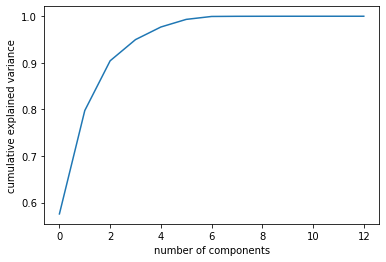

In [16]:
X=df1.iloc[:,:-1]
Y= df1.iloc[:,-1]
Y= pd.DataFrame(Y)
from sklearn.decomposition import PCA
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# 95% Variance

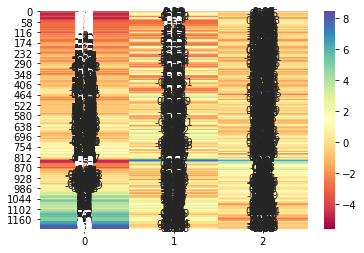

In [17]:
#number of components = 3
from sklearn.decomposition import PCA as sklPCA  
pca = sklPCA(n_components=3)            
pca.fit(X)                      
X_2D95 = pca.transform(X)         
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(X_2D95, annot=True, cmap='Spectral')
plt.show()

In [18]:
from numpy.linalg import eig
X_2D95=pd.DataFrame(X_2D95)
print('Covariance matrix: ',X_2D95.cov())
eigenvalues, eigenvectors = eig(X_2D95.cov())
print('Eigenvalues: ',eigenvalues)
print('Eigenvectors: ',eigenvectors)
print('Variance: ',pca.explained_variance_)

Covariance matrix:                0             1             2
0  7.490836e+00  4.221046e-16  5.628061e-16
1  4.221046e-16  2.886407e+00 -2.110523e-16
2  5.628061e-16 -2.110523e-16  1.389461e+00
Eigenvalues:  [7.49083556 1.38946129 2.88640725]
Eigenvectors:  [[ 1.00000000e+00 -9.22425182e-17 -9.16736165e-17]
 [ 0.00000000e+00  2.93098879e-16  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -3.22402818e-16]]
Variance:  [7.49083556 2.88640725 1.38946129]


# 99% Variance 

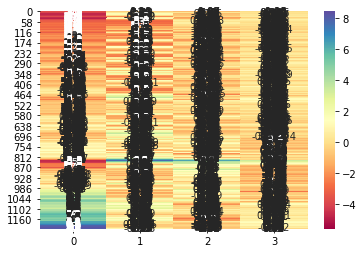

In [19]:
from sklearn.decomposition import PCA as sklPCA  
pca = sklPCA(n_components=4)            
pca.fit(X)                      
X_2D99 = pca.transform(X)         
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(X_2D99, annot=True, cmap='Spectral')
plt.show()

In [20]:
from numpy.linalg import eig
X_2D99=pd.DataFrame(X_2D99)
print('Covariance matrix: ',X_2D99.cov())
eigenvalues, eigenvectors = eig(X_2D99.cov())
print('Eigenvalues: ',eigenvalues)
print('Eigenvectors: ',eigenvectors)
print(pca.explained_variance_)

Covariance matrix:                0             1             2             3
0  7.490836e+00 -1.758769e-16 -6.566071e-16  5.159056e-16
1 -1.758769e-16  2.886407e+00 -1.407015e-16 -1.876020e-16
2 -6.566071e-16 -1.407015e-16  1.389461e+00 -2.345026e-17
3  5.159056e-16 -1.876020e-16 -2.345026e-17  5.917252e-01
Eigenvalues:  [7.49083556 0.59172523 1.38946129 2.88640725]
Eigenvectors:  [[ 1.00000000e+00  7.47785717e-17 -1.07616271e-16 -3.81973402e-17]
 [ 0.00000000e+00 -1.64571339e-16 -2.52448932e-16 -1.00000000e+00]
 [ 0.00000000e+00 -2.37320406e-16 -1.00000000e+00  2.68131474e-16]
 [ 0.00000000e+00 -1.00000000e+00 -1.18971055e-16  9.25425755e-17]]
[7.49083556 2.88640725 1.38946129 0.59172523]


# Train- test split 

# 95% Variance 

In [21]:
X1_train = X_2D95.iloc[:976,:]
X1_train.head()

,0,1,2
0,-3.765973,0.114391,-0.970175
1,-3.814503,0.261638,-0.970888
2,-3.699585,-0.241166,-0.935265
3,-3.638737,-0.487193,-0.988587
4,-4.012045,0.646072,-1.591582


In [22]:
Y1_train = Y.iloc[:976]
Y1_train=pd.DataFrame(Y1_train)
Y1_train.tail()

,13
971,0.560590
972,0.721741
973,0.586808
974,0.065327
975,-0.043498


In [23]:
X1_test = X_2D95.iloc[977:,:]
X1_test.reset_index(drop=True,inplace=True)
X1_test.head()

,0,1,2
0,1.071251,-0.889845,1.134729
1,0.879273,-0.685229,0.696701
2,1.002194,-0.865846,0.510488
3,1.023401,-1.145214,0.252041
4,1.150658,-1.131000,0.703939


In [24]:
Y1_test = Y.iloc[977:]
Y1_test=pd.DataFrame(Y1_test)
Y1_test.reset_index(drop=True,inplace=True)
Y1_test.tail()

,13
231,2.237061
232,0.176662
233,-0.057080
234,-0.944003
235,-0.379051


# 99% Variance

In [25]:
X2_train = X_2D99.iloc[:976,:]
X2_train.head()

,0,1,2,3
0,-3.765973,0.114391,-0.970175,-0.149906
1,-3.814503,0.261638,-0.970888,-0.232771
2,-3.699585,-0.241166,-0.935265,0.040815
3,-3.638737,-0.487193,-0.988587,-0.016478
4,-4.012045,0.646072,-1.591582,-0.413263


In [26]:
X2_test = X_2D99.iloc[977:,:]
X2_test.reset_index(drop=True,inplace=True)
X2_test.head()

,0,1,2,3
0,1.071251,-0.889845,1.134729,-0.644006
1,0.879273,-0.685229,0.696701,-0.564780
2,1.002194,-0.865846,0.510488,-0.548682
3,1.023401,-1.145214,0.252041,-0.313485
4,1.150658,-1.131000,0.703939,-0.756277


# Multiple Linear Regression

# 95% Variance

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X1_train, Y1_train)


LinearRegression()

In [28]:
from sklearn.metrics import mean_squared_error
pred = regr.predict(X1_test)
np.sqrt(mean_squared_error(Y1_test, pred))

1.160992555481043

# 99% Variance

In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X2_train, Y1_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error
pred = regr.predict(X2_test)
np.sqrt(mean_squared_error(Y1_test, pred))

1.1284309253470175